In [1]:
import time
import numpy as np 
from skimage.io import imread
from scipy.ndimage.filters import convolve
import matplotlib.pyplot as plt

C:\Users\paula\AppData\Local\Temp\ipykernel_2056\3027997710.py:4: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


In [2]:
class ObjectDecorator:
   def __init__(self, func):
      self.func = func
      self.counter = 0
      self.time=0
      self.array=[]
      self.min_val=0
      self.max_val=0
      self.mean_val=0
      self.sdev_val=0

   def __call__(self, *args, **kwargs):
      print('Hello from decorator object', self.counter)
      self.counter += 1
      start=time.time()
      self.func(*args, **kwargs)
      end=time.time()
      self.time=end-start
      self.array.append(self.time)
      print('time:', self.time)
      
   def minimum(self):
      self.min_val=np.min(self.array)
      return self.min_val
   def maximum(self):
      self.max_val=np.max(self.array)
      return self.max_val
   def stdev(self):
      self.sdev_val=np.std(self.array)
      return self.sdev_val
   def mean(self):
      self.mean_val=np.mean(self.array)
      return self.mean_val


In [3]:
img=imread('flower.jpg')
n=np.array([[-1,0,1],
            [-2,0,-2],
            [-1,0,-1]])

@ObjectDecorator
def conv(img,n):
    img_copy=img.copy()
    img_copy[:,:,0] = convolve(img_copy[:,:,0], n)
    img_copy[:,:,1] = convolve(img_copy[:,:,1], n)
    img_copy[:,:,2] = convolve(img_copy[:,:,2], n)  
    fig, ax = plt.subplots(ncols=2)
    ax[0].set_title("original")
    ax[0].imshow(img)
    ax[1].set_title("convolved")
    ax[1].imshow(img_copy)


Hello from decorator object 0
time: 0.08233785629272461


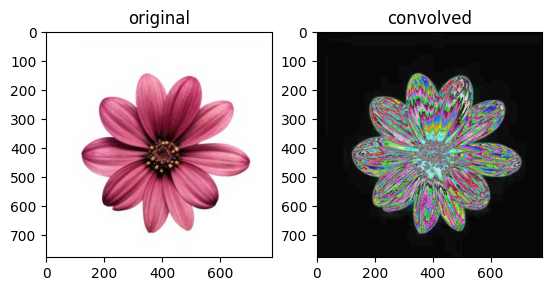

In [4]:
conv(img,n)

In [6]:
print(conv.minimum())

0.08233785629272461
